## Ruido Sal y Pimienta 

El "ruido sal y pimienta" es un tipo de ruido que puede afectar las imágenes digitales. Se caracteriza por la presencia de píxeles aleatorios de valor máximo y mínimo, pareciendo puntos blancos y negros dispersos sobre la imagen, de ahí el nombre "sal y pimienta". Este tipo de ruido es común en la transmisión de imágenes en entornos de comunicación digital.

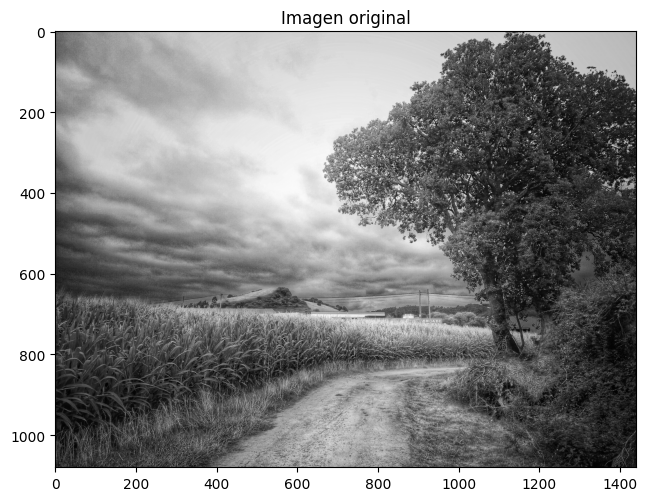

In [10]:
import cv2 as cv
from matplotlib import pyplot as plt
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
img02=cv.imread('paisaje.jpeg',cv.IMREAD_GRAYSCALE)
imshow("Imagen original",img02)

/var/folders/sd/vrjwt23d39s1ymw5vbmg_p680000gn/T/ipykernel_55776/149123860.py:9: RuntimeWarning: overflow encountered in scalar add
  img03[j, i] = np.clip(img02[j, i] + 10, 0, 255)


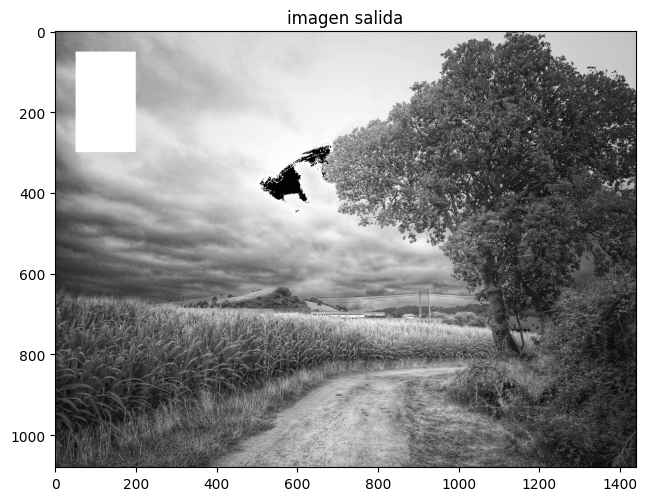

In [11]:
import numpy as np
h,w =img02.shape
img03=np.zeros((h,w),np.uint8)
for j in range(h):
    for i in range(w):
        if ((j>50 and j<300) and (i>50 and i <200)):
            img03[j,i]=255
        else:
            img03[j, i] = np.clip(img02[j, i] + 10, 0, 255)
imshow("imagen salida",img03)
    

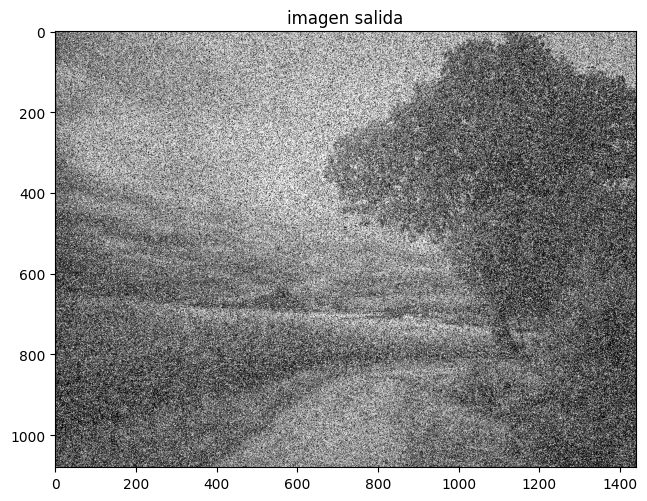

In [12]:
# Definir la probabilidad de ruido
probabilidad = 0.50

# Crear una matriz de ruido del mismo tamaño que la imagen original
ruido = np.zeros_like(img02)

# Rellenar la matriz de ruido con valores aleatorios entre 0 y 255
cv.randu(ruido, 0, 255)

# Crear una copia de la imagen original
img_con_ruido = img02.copy()

# Aplicar ruido "sal" (píxeles negros)
img_con_ruido[ruido < int(255 * probabilidad / 2)] = 0

# Aplicar ruido "pimienta" (píxeles blancos)
img_con_ruido[ruido > 255 - int(255 * probabilidad / 2)] = 255

# Mostrar imagen con ruido implementado 
imshow("imagen salida",img_con_ruido)

In [18]:
a,b = img_con_ruido.shape
## for j in range(a):
  ##  for i in range(b):
      ##  print(img_con_ruido[j,i])11
print(255 - int(255 * probabilidad / 2))

192


## Filtros promedio 
Para eliminar el rudio

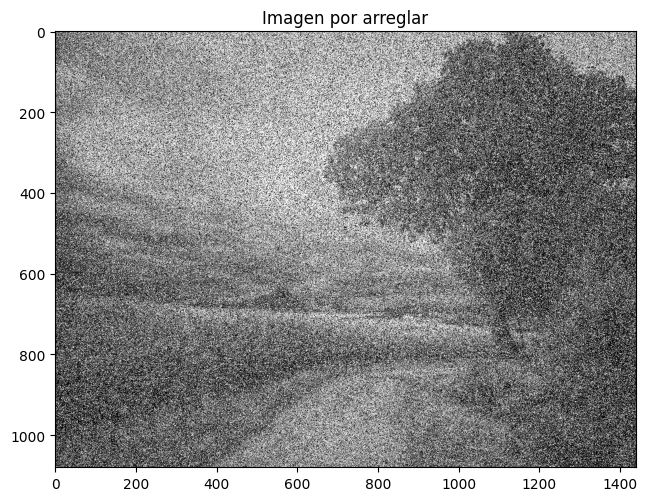

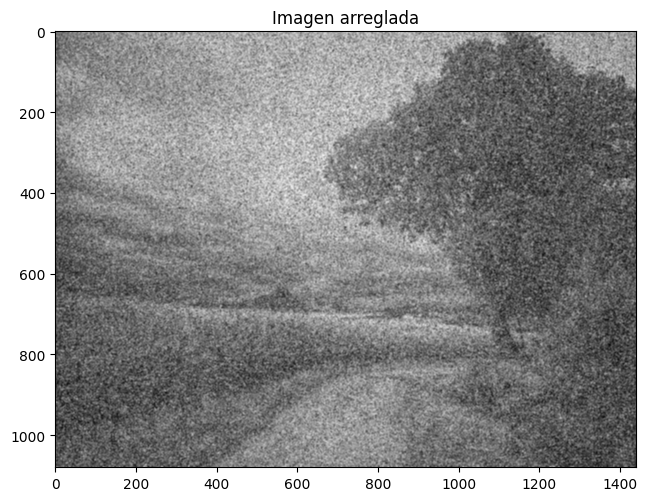

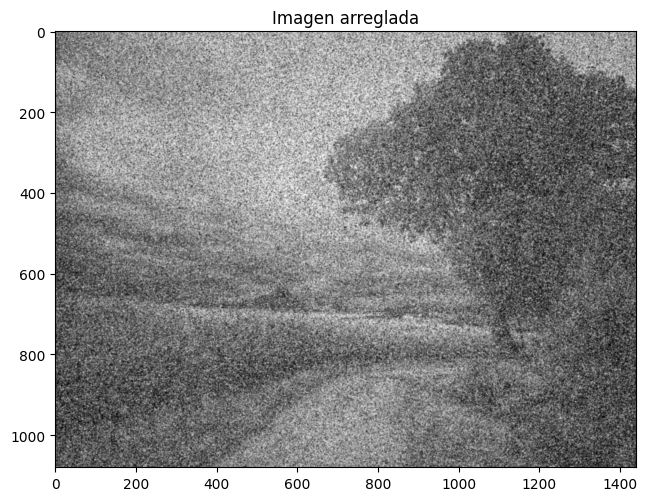

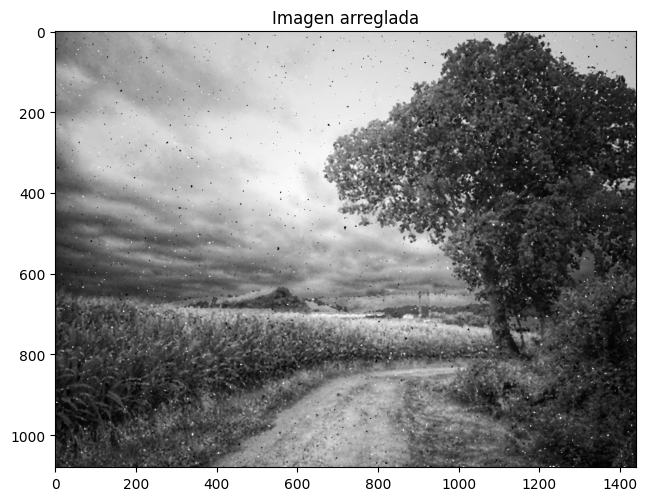

Kernel Gaussiano Bidimensional:
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


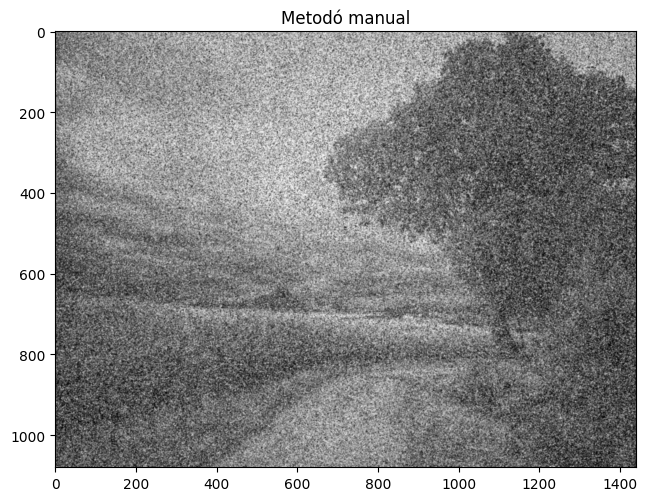

In [32]:
imagen_arreglada = img_con_ruido
imshow("Imagen por arreglar",imagen_arreglada)
kernel3x3 = np.ones((3,3,), np.float32) / 9
#promedio = cv.filter2D(imagen_arreglada,-1, kernel3x3)
blur = cv.blur(imagen_arreglada, (5,5))
Gaussian = cv.GaussianBlur(imagen_arreglada, (5,5), 0)
median = cv.medianBlur(imagen_arreglada, 5)

imshow("Imagen arreglada", blur)
imshow("Imagen arreglada", Gaussian)
imshow("Imagen arreglada", median)


# Definir el tamaño del kernel y la desviación estándar
ksize = 5  # Tamaño del kernel (debe ser impar)
sigma = 1.0  # Desviación estándar

# Crear un array de coordenadas
ax = np.linspace(-(ksize // 2), ksize // 2, ksize)
xx, yy = np.meshgrid(ax, ax)

# Calcular la función gaussiana
kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))

# Normalizar el kernel para que la suma de todos los elementos sea 1
kernel = kernel / np.sum(kernel)

print("Kernel Gaussiano Bidimensional:")
print(kernel)
from scipy.ndimage import convolve

blurred_image = convolve(imagen_arreglada, kernel)
imshow("Metodó manual", blurred_image)

# Errores 
Una forma de evaluar y determinar el resultado es haciendo una comparación entre la imagen igual y la media 